✅ Combined features shape: (49390, 687)
✅ Available Columns: ['hour_ts', 'start_station_name', 'start_station_id', 'ride_count', 'hour', 'hour_sin', 'hour_cos', 'day_of_week', 'is_holiday_or_weekend', 'month', 'is_peak_hour', 'day_of_year', 'time_of_day', 'ride_count_roll3', 'target_ride_count', 'ride_count_lag_1', 'ride_count_lag_2', 'ride_count_lag_3', 'ride_count_lag_4', 'ride_count_lag_5', 'ride_count_lag_6', 'ride_count_lag_7', 'ride_count_lag_8', 'ride_count_lag_9', 'ride_count_lag_10', 'ride_count_lag_11', 'ride_count_lag_12', 'ride_count_lag_13', 'ride_count_lag_14', 'ride_count_lag_15', 'ride_count_lag_16', 'ride_count_lag_17', 'ride_count_lag_18', 'ride_count_lag_19', 'ride_count_lag_20', 'ride_count_lag_21', 'ride_count_lag_22', 'ride_count_lag_23', 'ride_count_lag_24', 'ride_count_lag_25', 'ride_count_lag_26', 'ride_count_lag_27', 'ride_count_lag_28', 'ride_count_lag_29', 'ride_count_lag_30', 'ride_count_lag_31', 'ride_count_lag_32', 'ride_count_lag_33', 'ride_count_lag_34'

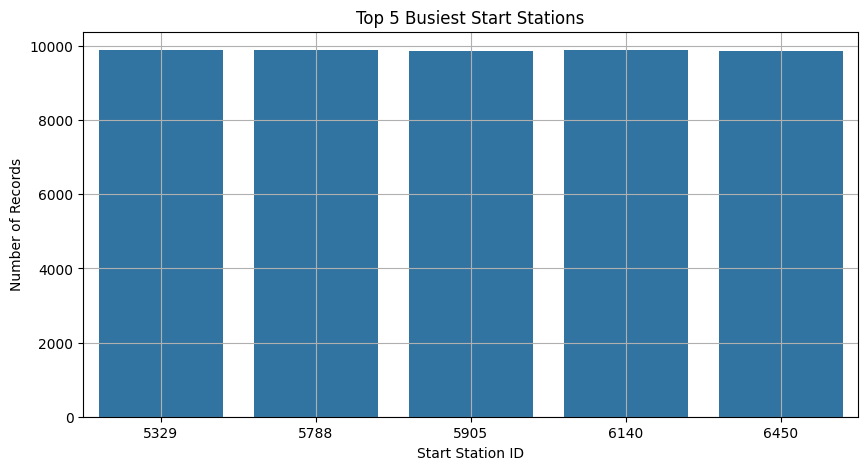

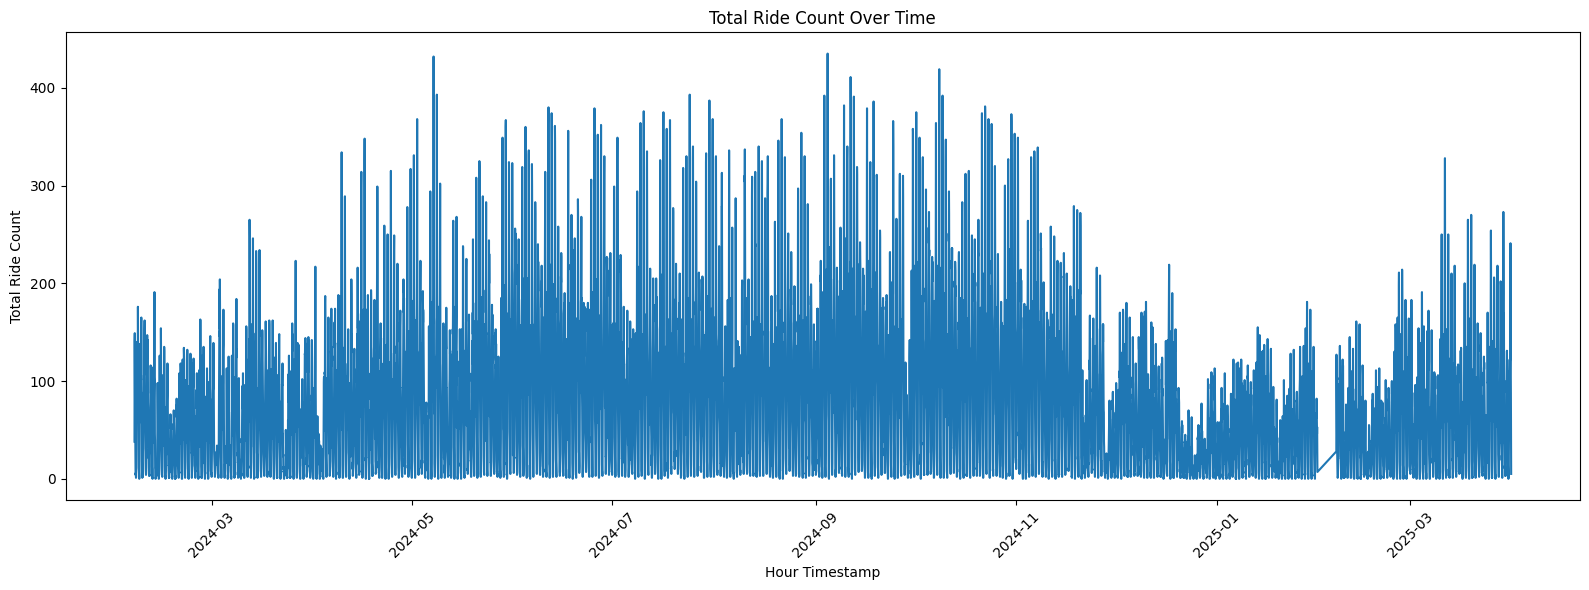

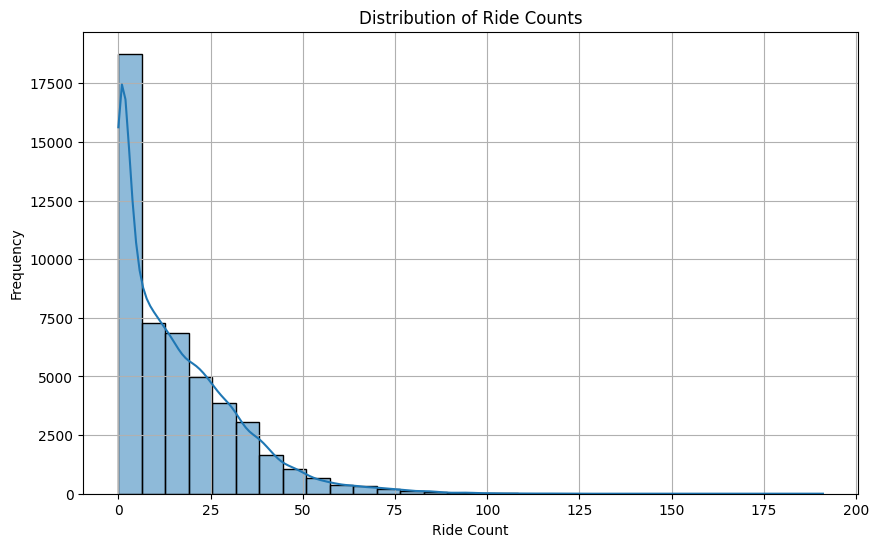

MemoryError: 

<Figure size 1200x800 with 2 Axes>

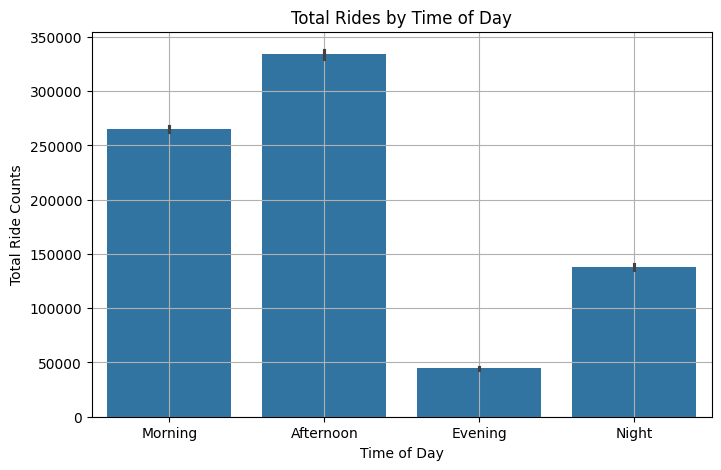

✅ Visualization notebook complete!


In [1]:
# 📦 IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 📂 PATHS
features_path = Path(r"C:\Users\MD\Desktop\citi\data\processed\final_features")

# 🎯 Load Feature+Target Datasets
df_2024 = pd.read_parquet(features_path / "rides_citibike_final_2024_with_lags.parquet")
df_2025 = pd.read_parquet(features_path / "rides_citibike_final_2025_with_lags.parquet")

# ✅ Combine 2024 and 2025
df = pd.concat([df_2024, df_2025]).reset_index(drop=True)

print(f"✅ Combined features shape: {df.shape}")
print("✅ Available Columns:", df.columns.tolist())

# ==============================
# 📊 Top 5 Start Stations
# ==============================

plt.figure(figsize=(10, 5))
top_stations = df["start_station_id"].value_counts().head(5)
sns.barplot(x=top_stations.index, y=top_stations.values)
plt.title("Top 5 Busiest Start Stations")
plt.xlabel("Start Station ID")
plt.ylabel("Number of Records")
plt.grid(True)
plt.show()

# ==============================
# 📈 Rides per Hour Over Time
# ==============================

plt.figure(figsize=(16, 6))

# ✅ Group by correct column
df_hourly = df.groupby("hour_ts")["ride_count"].sum().reset_index()

sns.lineplot(x="hour_ts", y="ride_count", data=df_hourly)
plt.title("Total Ride Count Over Time")
plt.xlabel("Hour Timestamp")
plt.ylabel("Total Ride Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==============================
# 📉 Distribution of Ride Counts (ride_count column, not target)
# ==============================

plt.figure(figsize=(10, 6))
sns.histplot(df["ride_count"], bins=30, kde=True)
plt.title("Distribution of Ride Counts")
plt.xlabel("Ride Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# ==============================
# 🔥 Correlation Heatmap (Lag and Roll Features)
# ==============================

plt.figure(figsize=(12, 8))
feature_cols = [col for col in df.columns if "lag" in col or "roll" in col]
corr = df[feature_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Lag and Rolling Features")
plt.show()

# ==============================
# 🌞 Time of Day Analysis
# ==============================

# Extract hour from hour_ts
df["hour"] = pd.to_datetime(df["hour_ts"]).dt.hour

# Define time of day mapping
def map_time_of_day(hour):
    if 0 <= hour <= 5:
        return "Night"
    elif 6 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 17:
        return "Afternoon"
    else:
        return "Evening"

df["time_of_day"] = df["hour"].apply(map_time_of_day)

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="time_of_day", y="ride_count", data=df, estimator=np.sum, order=["Morning", "Afternoon", "Evening", "Night"])
plt.title("Total Rides by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Ride Counts")
plt.grid(True)
plt.show()

print("✅ Visualization notebook complete!")


🔵 Loading file: ..\data\processed\timeseries\rides_2024_01.parquet
✅ Top Station ID: 6140 → W 21 St & 6 Ave


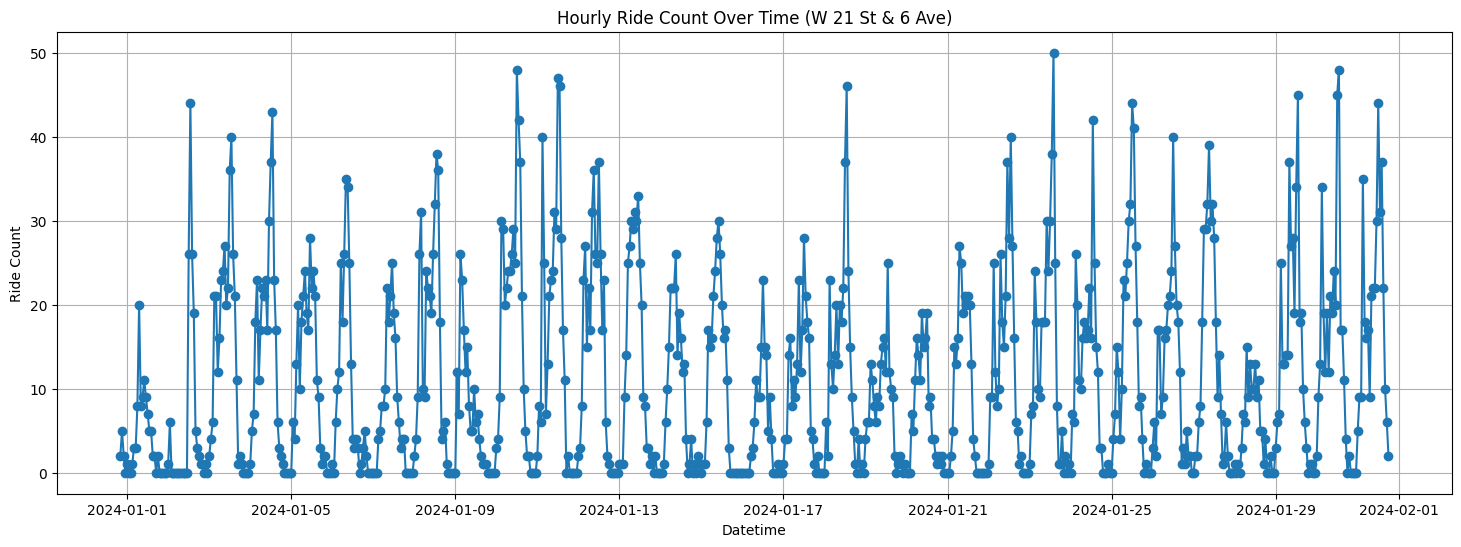

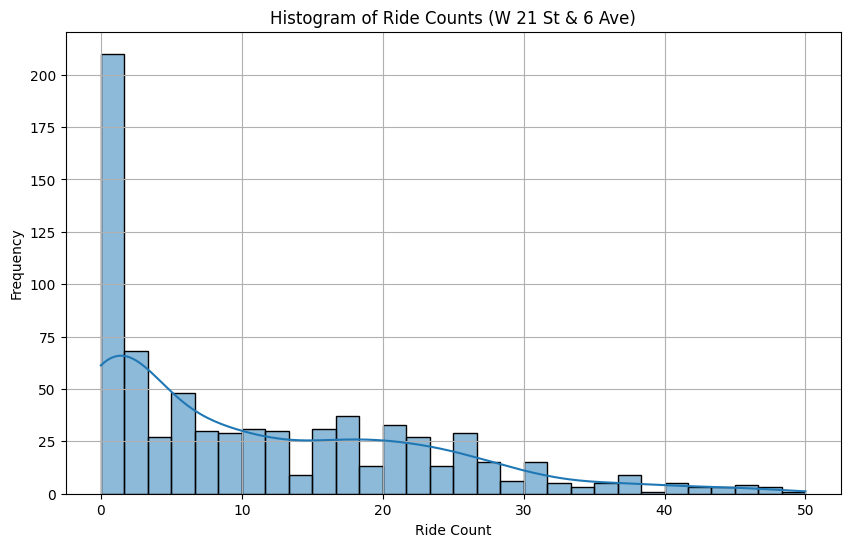

MemoryError: bad allocation

<Figure size 1000x800 with 2 Axes>

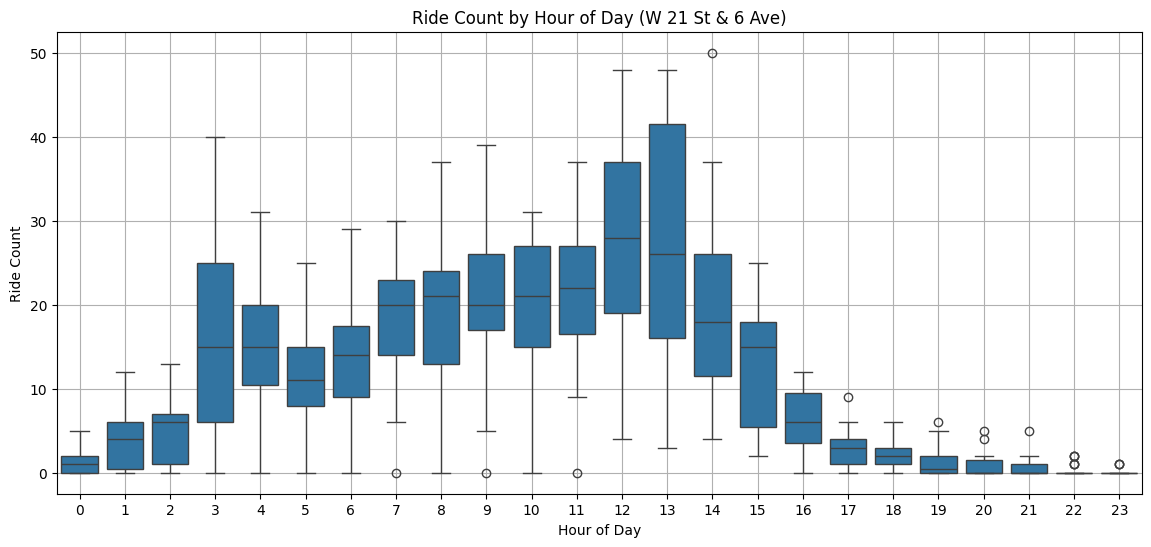

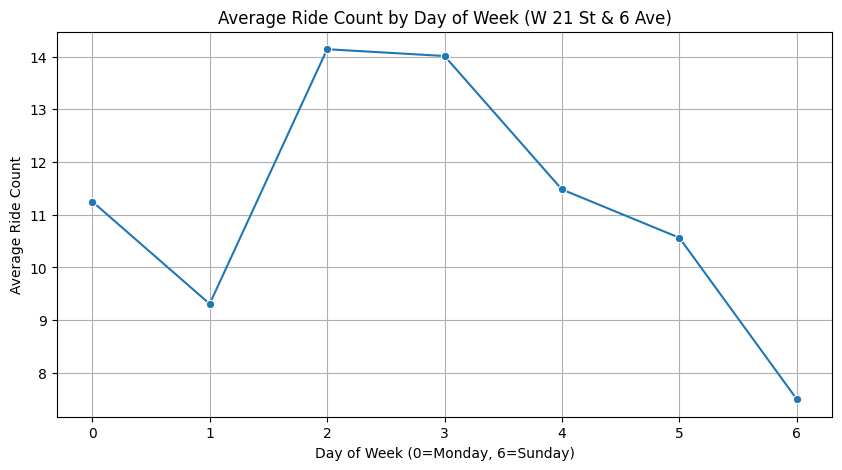

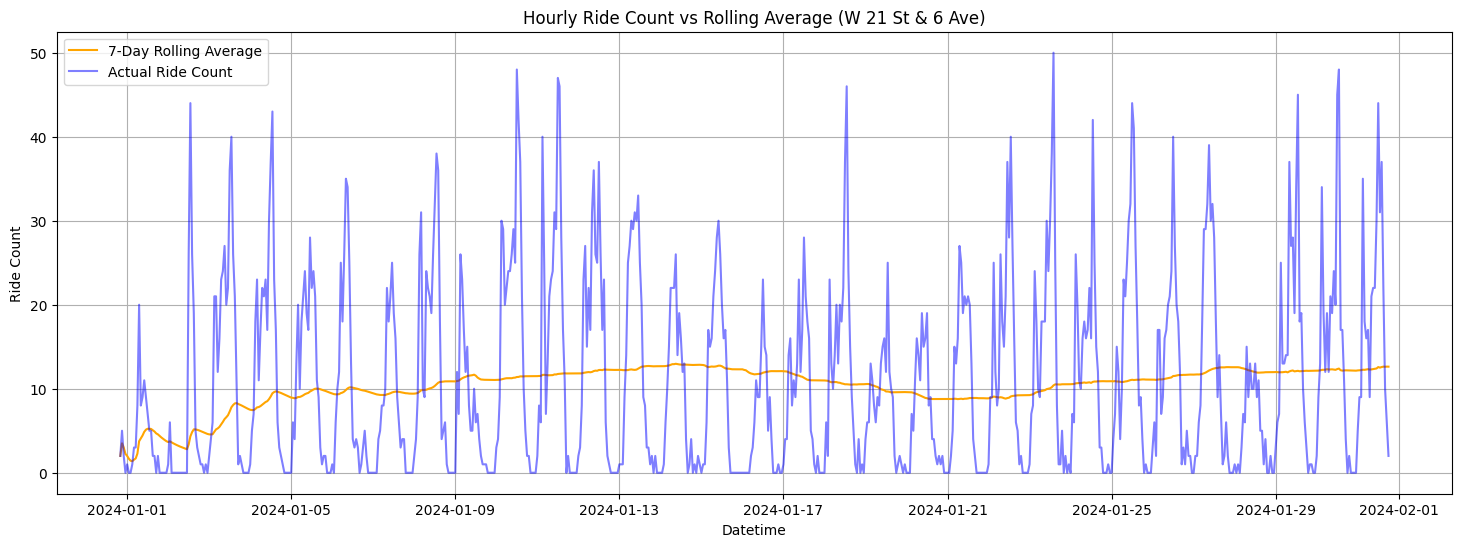

In [2]:
# 06_visualization_citibike.ipynb
# Citi Bike Project Visualization Notebook (Fixed)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# === Load Timeseries Data ===
input_path = Path("../data/processed/timeseries")
file_path = input_path / "rides_2024_01.parquet"

print(f"🔵 Loading file: {file_path}")
df = pd.read_parquet(file_path)

# === Focus on Top 1 Busiest Station ID ===
top_station_id = (
    df.groupby("start_station_id")["ride_count"]
    .sum()
    .sort_values(ascending=False)
    .head(1)
    .index[0]
)

station_name = df[df["start_station_id"] == top_station_id]["start_station_name"].iloc[0]

print(f"✅ Top Station ID: {top_station_id} → {station_name}")

# Filter for the top station
df_top = df[df["start_station_id"] == top_station_id].reset_index(drop=True)

# === Fix: Create missing columns ===

# Create 'is_weekend' column (Saturday=5, Sunday=6)
df_top["is_weekend"] = df_top["day_of_week"].isin([5, 6])

# Create placeholder 'is_holiday' column (all False for now)
df_top["is_holiday"] = False

# === Visualization 1: Ride Count Over Time ===
plt.figure(figsize=(18, 6))
plt.plot(df_top["hour_ts"], df_top["ride_count"], marker='o', linestyle='-')
plt.title(f"Hourly Ride Count Over Time ({station_name})")
plt.xlabel("Datetime")
plt.ylabel("Ride Count")
plt.grid(True)
plt.show()

# === Visualization 2: Histogram of Ride Counts ===
plt.figure(figsize=(10, 6))
sns.histplot(df_top["ride_count"], bins=30, kde=True)
plt.title(f"Histogram of Ride Counts ({station_name})")
plt.xlabel("Ride Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# === Visualization 3: Correlation Matrix ===
df_corr = df_top[["ride_count", "hour", "day_of_week", "is_weekend", "hour_sin", "hour_cos"]]
corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Correlation Matrix ({station_name})")
plt.show()

# === Visualization 4: Boxplot - Ride Count by Hour of Day ===
plt.figure(figsize=(14, 6))
sns.boxplot(x="hour", y="ride_count", data=df_top)
plt.title(f"Ride Count by Hour of Day ({station_name})")
plt.xlabel("Hour of Day")
plt.ylabel("Ride Count")
plt.grid(True)
plt.show()

# === Visualization 5: Lineplot - Average Ride Count by Day of Week ===
avg_rides_per_day = df_top.groupby("day_of_week")["ride_count"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_rides_per_day.index, y=avg_rides_per_day.values, marker='o')
plt.title(f"Average Ride Count by Day of Week ({station_name})")
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Ride Count")
plt.grid(True)
plt.show()

# === (Optional) Visualization 6: Rolling Average (7 Days Window) ===
plt.figure(figsize=(18, 6))
df_top["rolling_avg"] = df_top["ride_count"].rolling(window=24*7, min_periods=1).mean()
plt.plot(df_top["hour_ts"], df_top["rolling_avg"], label="7-Day Rolling Average", color="orange")
plt.plot(df_top["hour_ts"], df_top["ride_count"], alpha=0.5, label="Actual Ride Count", color="blue")
plt.title(f"Hourly Ride Count vs Rolling Average ({station_name})")
plt.xlabel("Datetime")
plt.ylabel("Ride Count")
plt.legend()
plt.grid(True)
plt.show()


🔵 Loading file: ..\data\processed\timeseries\rides_2024_01.parquet
✅ Top 2 Station ID: 6450 → 8 Ave & W 31 St


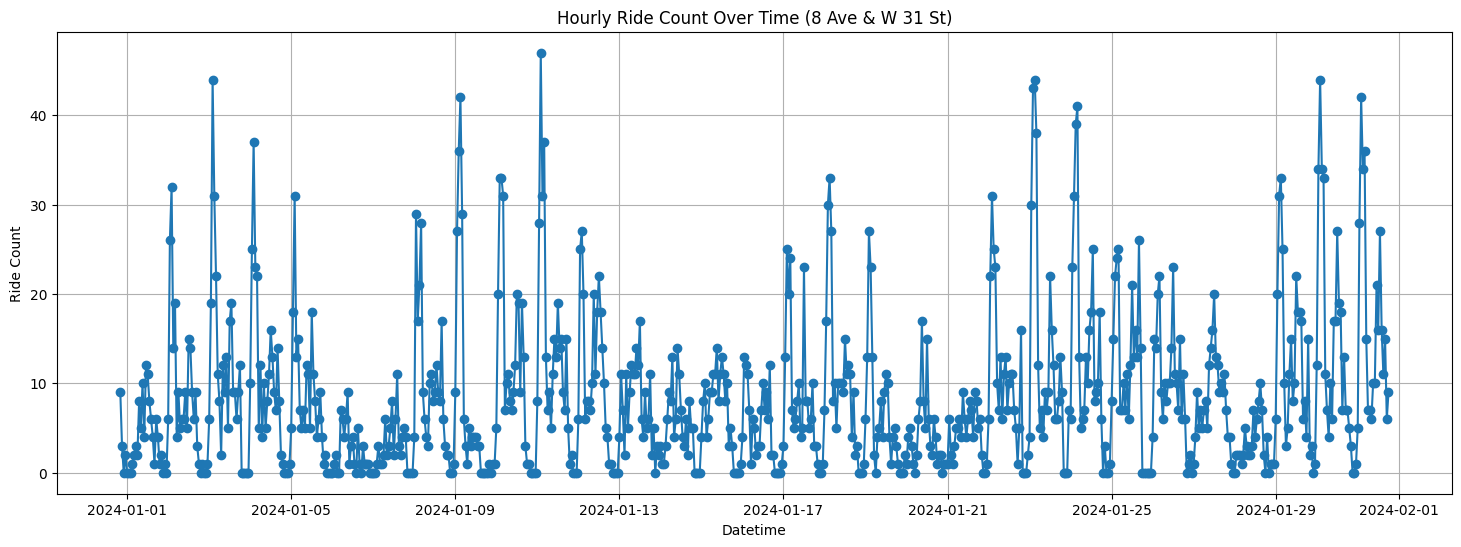

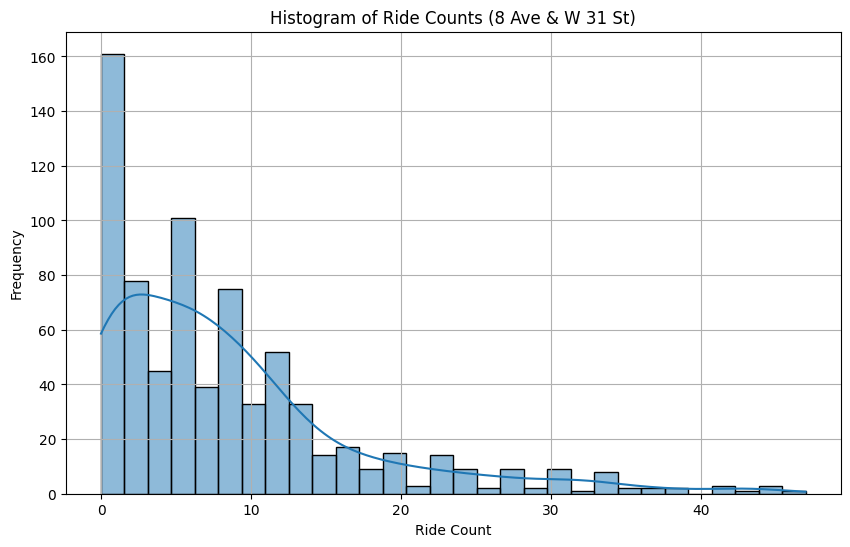

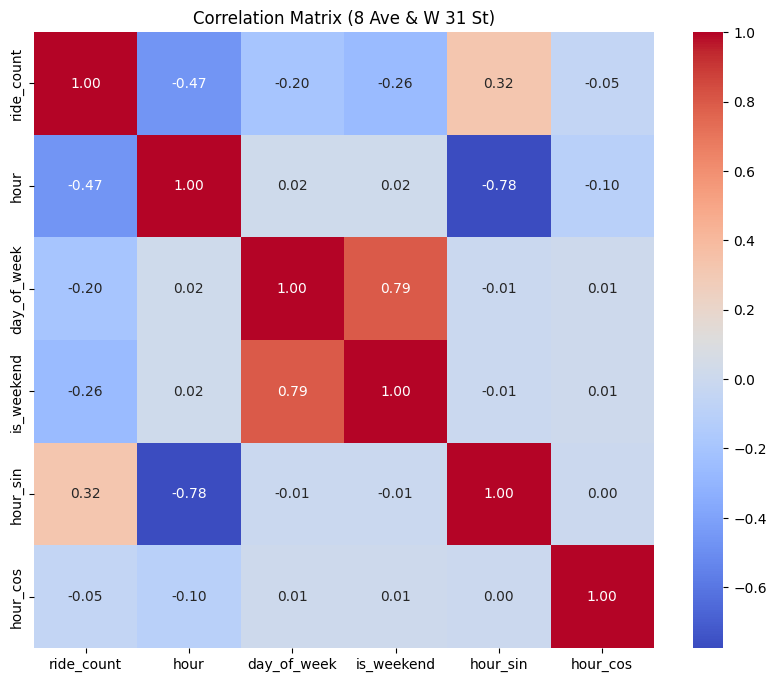

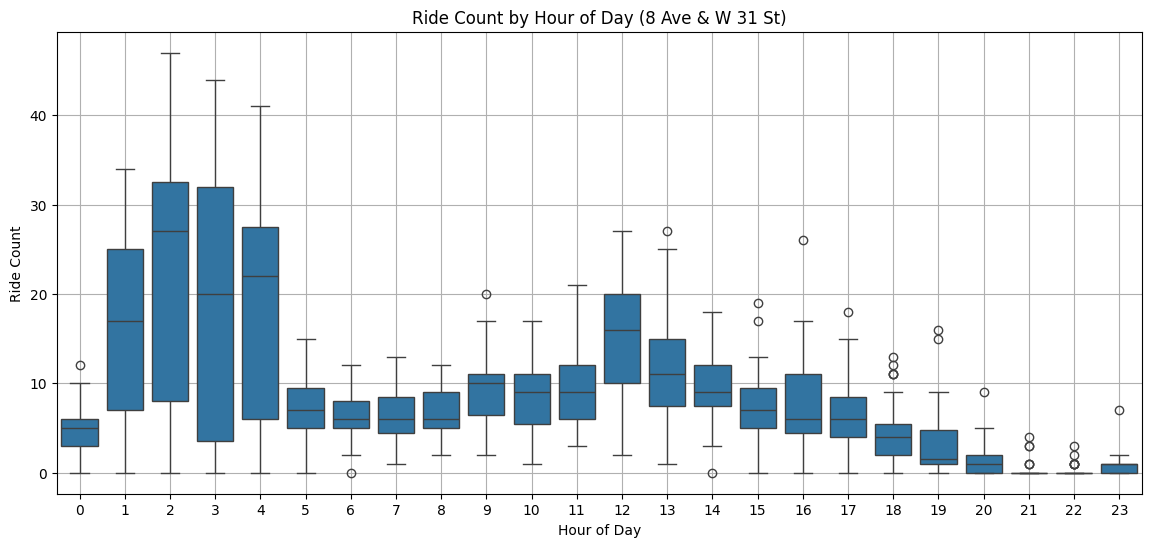

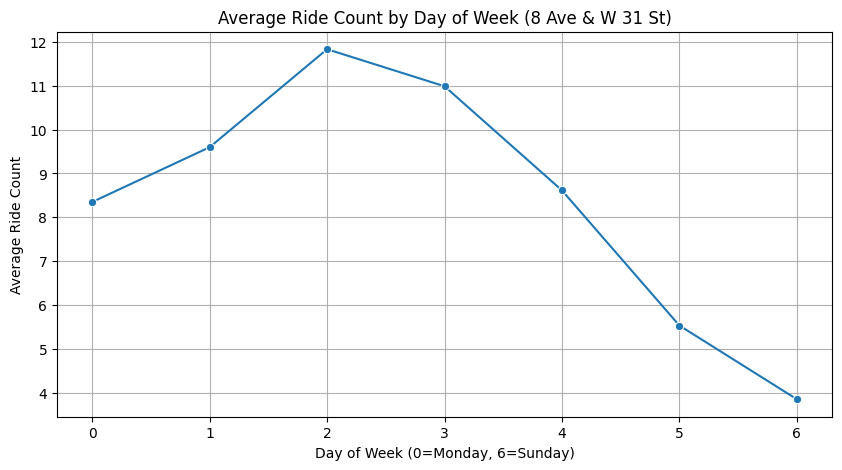

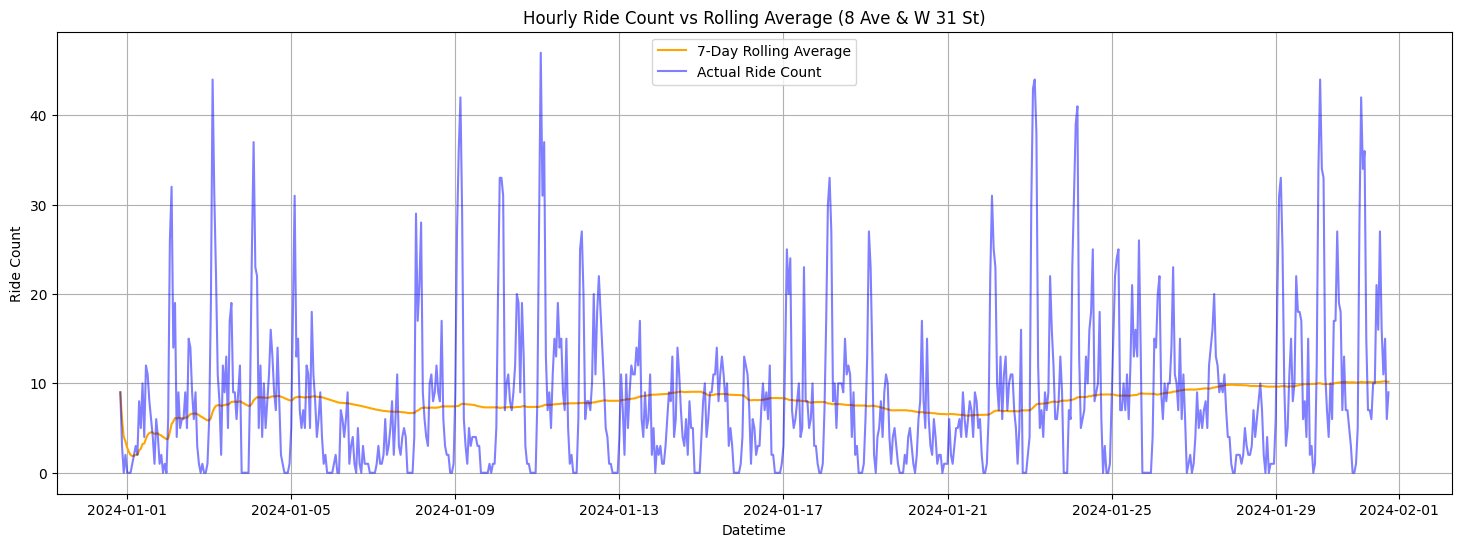

In [3]:
# 06_visualization_citibike.ipynb
# Citi Bike Project Visualization Notebook (Fixed)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# === Load Timeseries Data ===
input_path = Path("../data/processed/timeseries")
file_path = input_path / "rides_2024_01.parquet"

print(f"🔵 Loading file: {file_path}")
df = pd.read_parquet(file_path)

top_station_id = (
    df.groupby("start_station_id")["ride_count"]
    .sum()
    .sort_values(ascending=False)
    .head(2)
    .index[1]   # ⬅️ Now picking SECOND busiest station (index 1)
)

station_name = df[df["start_station_id"] == top_station_id]["start_station_name"].iloc[0]

print(f"✅ Top 2 Station ID: {top_station_id} → {station_name}")

# Filter for the top station
df_top = df[df["start_station_id"] == top_station_id].reset_index(drop=True)

# === Fix: Create missing columns ===

# Create 'is_weekend' column (Saturday=5, Sunday=6)
df_top["is_weekend"] = df_top["day_of_week"].isin([5, 6])

# Create placeholder 'is_holiday' column (all False for now)
df_top["is_holiday"] = False

# === Visualization 1: Ride Count Over Time ===
plt.figure(figsize=(18, 6))
plt.plot(df_top["hour_ts"], df_top["ride_count"], marker='o', linestyle='-')
plt.title(f"Hourly Ride Count Over Time ({station_name})")
plt.xlabel("Datetime")
plt.ylabel("Ride Count")
plt.grid(True)
plt.show()

# === Visualization 2: Histogram of Ride Counts ===
plt.figure(figsize=(10, 6))
sns.histplot(df_top["ride_count"], bins=30, kde=True)
plt.title(f"Histogram of Ride Counts ({station_name})")
plt.xlabel("Ride Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# === Visualization 3: Correlation Matrix ===
df_corr = df_top[["ride_count", "hour", "day_of_week", "is_weekend", "hour_sin", "hour_cos"]]
corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Correlation Matrix ({station_name})")
plt.show()

# === Visualization 4: Boxplot - Ride Count by Hour of Day ===
plt.figure(figsize=(14, 6))
sns.boxplot(x="hour", y="ride_count", data=df_top)
plt.title(f"Ride Count by Hour of Day ({station_name})")
plt.xlabel("Hour of Day")
plt.ylabel("Ride Count")
plt.grid(True)
plt.show()

# === Visualization 5: Lineplot - Average Ride Count by Day of Week ===
avg_rides_per_day = df_top.groupby("day_of_week")["ride_count"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_rides_per_day.index, y=avg_rides_per_day.values, marker='o')
plt.title(f"Average Ride Count by Day of Week ({station_name})")
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Ride Count")
plt.grid(True)
plt.show()

# === (Optional) Visualization 6: Rolling Average (7 Days Window) ===
plt.figure(figsize=(18, 6))
df_top["rolling_avg"] = df_top["ride_count"].rolling(window=24*7, min_periods=1).mean()
plt.plot(df_top["hour_ts"], df_top["rolling_avg"], label="7-Day Rolling Average", color="orange")
plt.plot(df_top["hour_ts"], df_top["ride_count"], alpha=0.5, label="Actual Ride Count", color="blue")
plt.title(f"Hourly Ride Count vs Rolling Average ({station_name})")
plt.xlabel("Datetime")
plt.ylabel("Ride Count")
plt.legend()
plt.grid(True)
plt.show()


🔵 Loading file: ..\data\processed\timeseries\rides_2024_01.parquet
✅ Top 3 Station ID: 5788 → Lafayette St & E 8 St


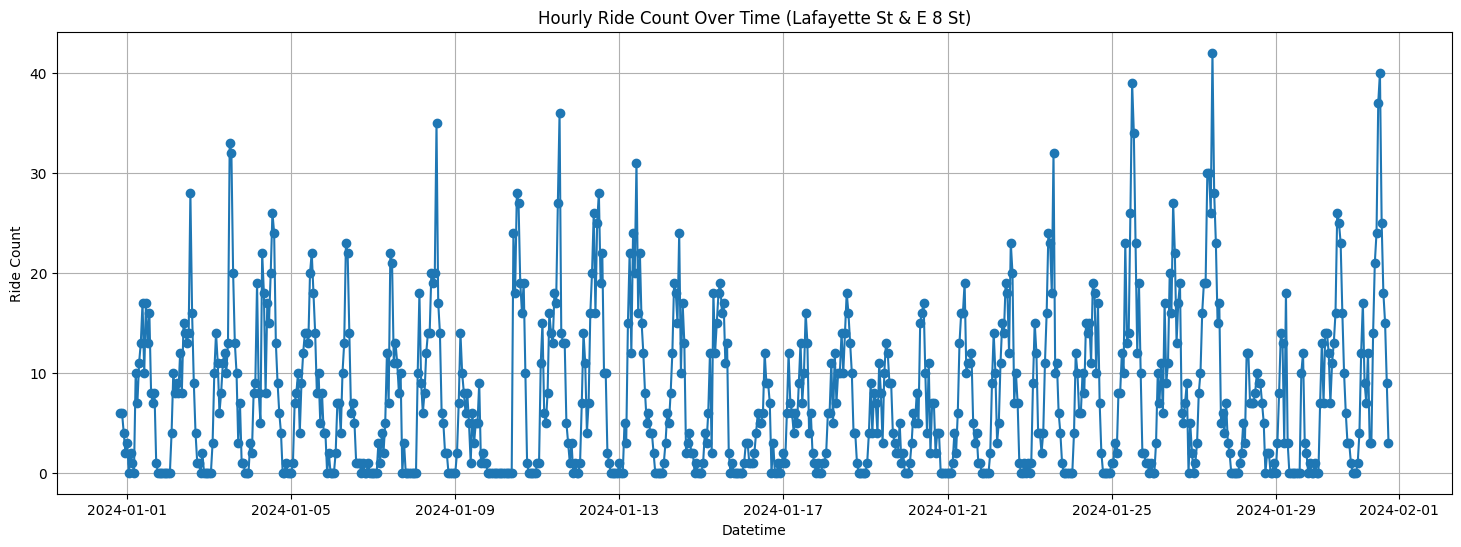

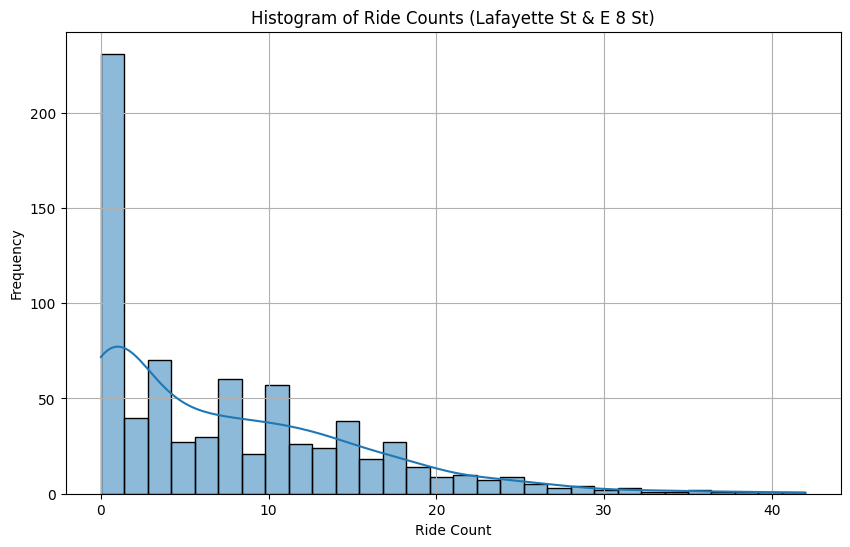

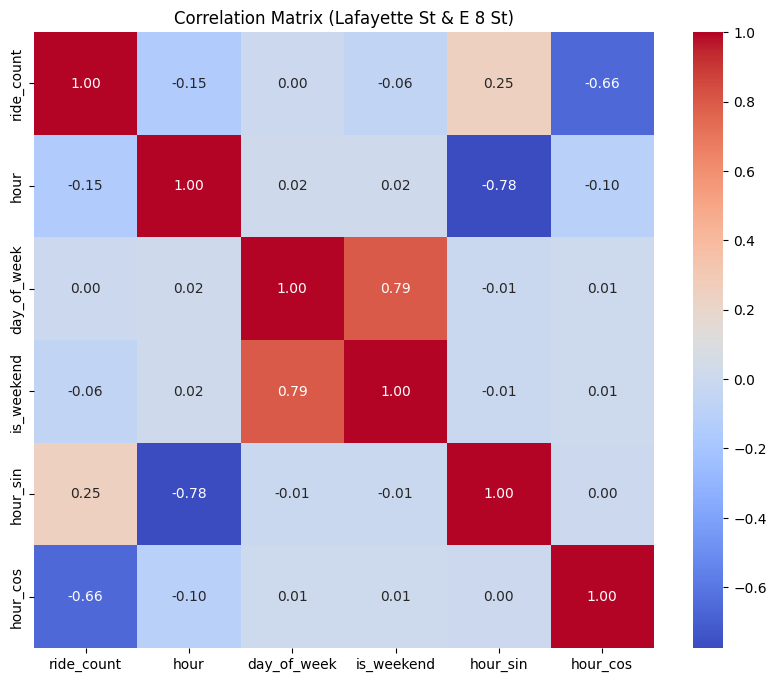

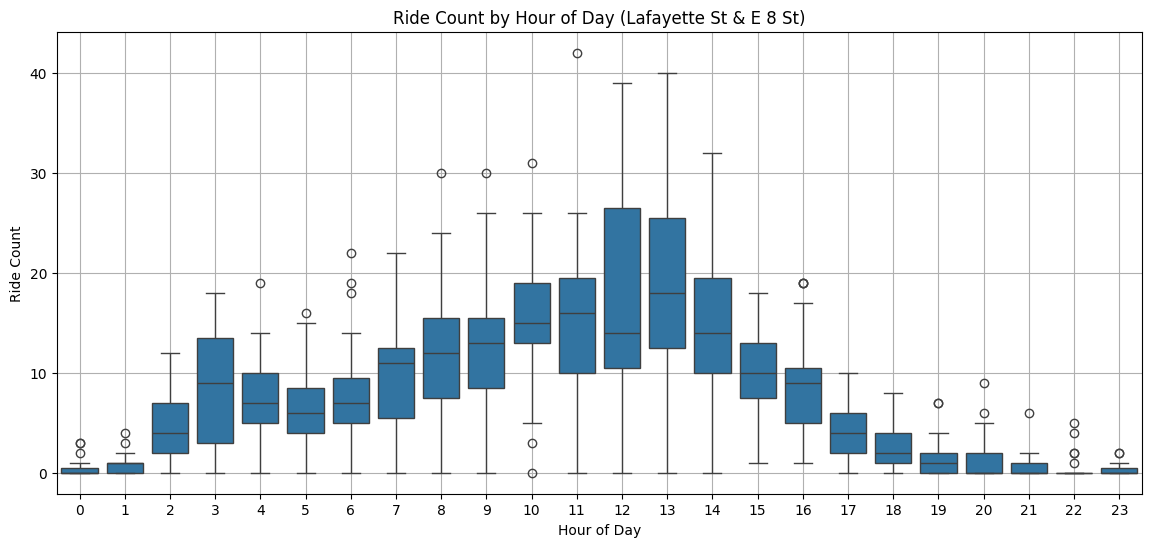

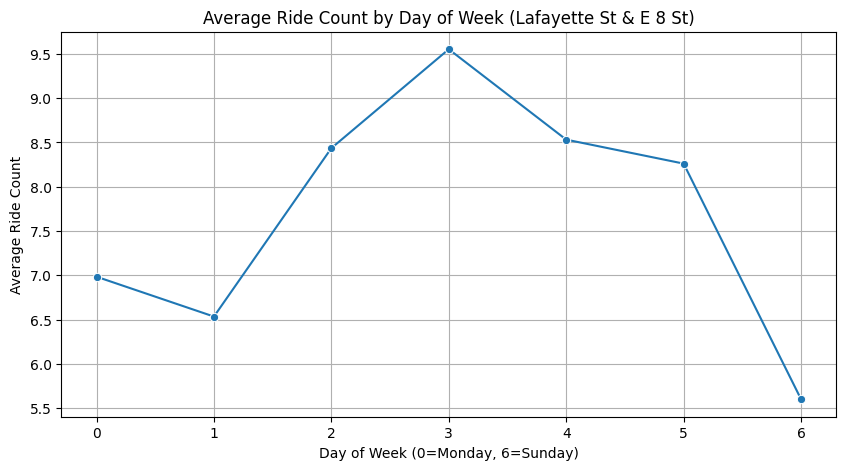

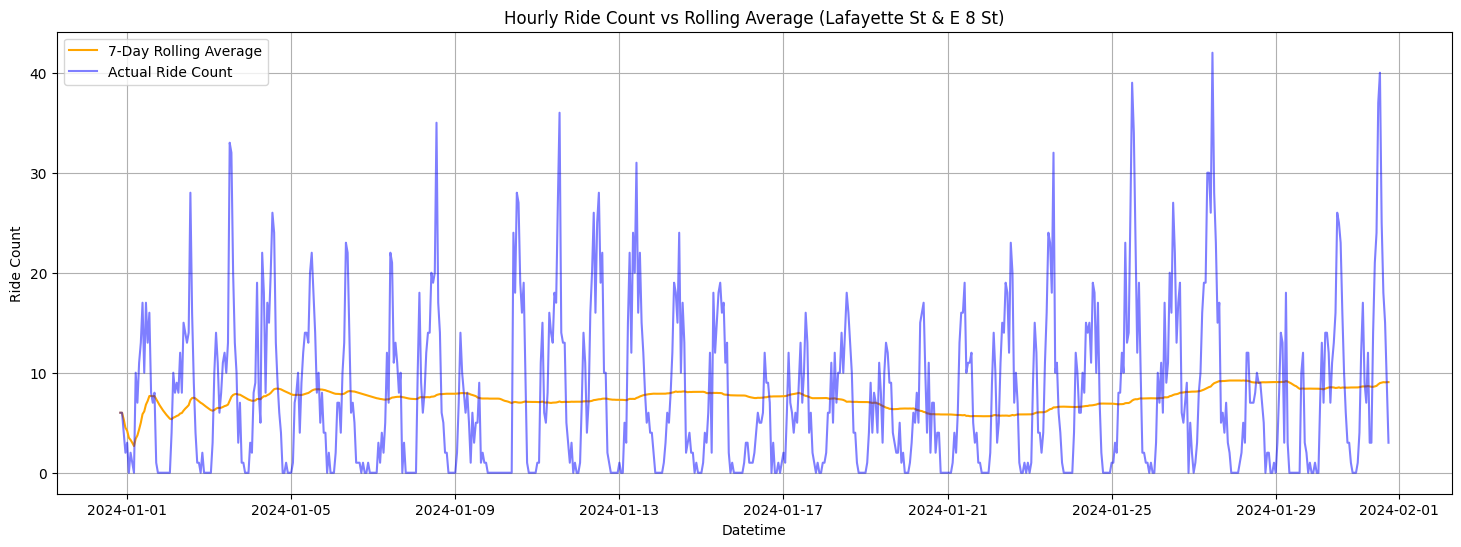

In [4]:
# 06_visualization_citibike.ipynb
# Citi Bike Project Visualization Notebook (Fixed)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# === Load Timeseries Data ===
input_path = Path("../data/processed/timeseries")
file_path = input_path / "rides_2024_01.parquet"

print(f"🔵 Loading file: {file_path}")
df = pd.read_parquet(file_path)

top_station_id = (
    df.groupby("start_station_id")["ride_count"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index[2]   # ⬅️ Now picking SECOND busiest station (index 1)
)

station_name = df[df["start_station_id"] == top_station_id]["start_station_name"].iloc[0]

print(f"✅ Top 3 Station ID: {top_station_id} → {station_name}")

# Filter for the top station
df_top = df[df["start_station_id"] == top_station_id].reset_index(drop=True)

# === Fix: Create missing columns ===

# Create 'is_weekend' column (Saturday=5, Sunday=6)
df_top["is_weekend"] = df_top["day_of_week"].isin([5, 6])

# Create placeholder 'is_holiday' column (all False for now)
df_top["is_holiday"] = False

# === Visualization 1: Ride Count Over Time ===
plt.figure(figsize=(18, 6))
plt.plot(df_top["hour_ts"], df_top["ride_count"], marker='o', linestyle='-')
plt.title(f"Hourly Ride Count Over Time ({station_name})")
plt.xlabel("Datetime")
plt.ylabel("Ride Count")
plt.grid(True)
plt.show()

# === Visualization 2: Histogram of Ride Counts ===
plt.figure(figsize=(10, 6))
sns.histplot(df_top["ride_count"], bins=30, kde=True)
plt.title(f"Histogram of Ride Counts ({station_name})")
plt.xlabel("Ride Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# === Visualization 3: Correlation Matrix ===
df_corr = df_top[["ride_count", "hour", "day_of_week", "is_weekend", "hour_sin", "hour_cos"]]
corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Correlation Matrix ({station_name})")
plt.show()

# === Visualization 4: Boxplot - Ride Count by Hour of Day ===
plt.figure(figsize=(14, 6))
sns.boxplot(x="hour", y="ride_count", data=df_top)
plt.title(f"Ride Count by Hour of Day ({station_name})")
plt.xlabel("Hour of Day")
plt.ylabel("Ride Count")
plt.grid(True)
plt.show()

# === Visualization 5: Lineplot - Average Ride Count by Day of Week ===
avg_rides_per_day = df_top.groupby("day_of_week")["ride_count"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_rides_per_day.index, y=avg_rides_per_day.values, marker='o')
plt.title(f"Average Ride Count by Day of Week ({station_name})")
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Ride Count")
plt.grid(True)
plt.show()

# === (Optional) Visualization 6: Rolling Average (7 Days Window) ===
plt.figure(figsize=(18, 6))
df_top["rolling_avg"] = df_top["ride_count"].rolling(window=24*7, min_periods=1).mean()
plt.plot(df_top["hour_ts"], df_top["rolling_avg"], label="7-Day Rolling Average", color="orange")
plt.plot(df_top["hour_ts"], df_top["ride_count"], alpha=0.5, label="Actual Ride Count", color="blue")
plt.title(f"Hourly Ride Count vs Rolling Average ({station_name})")
plt.xlabel("Datetime")
plt.ylabel("Ride Count")
plt.legend()
plt.grid(True)
plt.show()


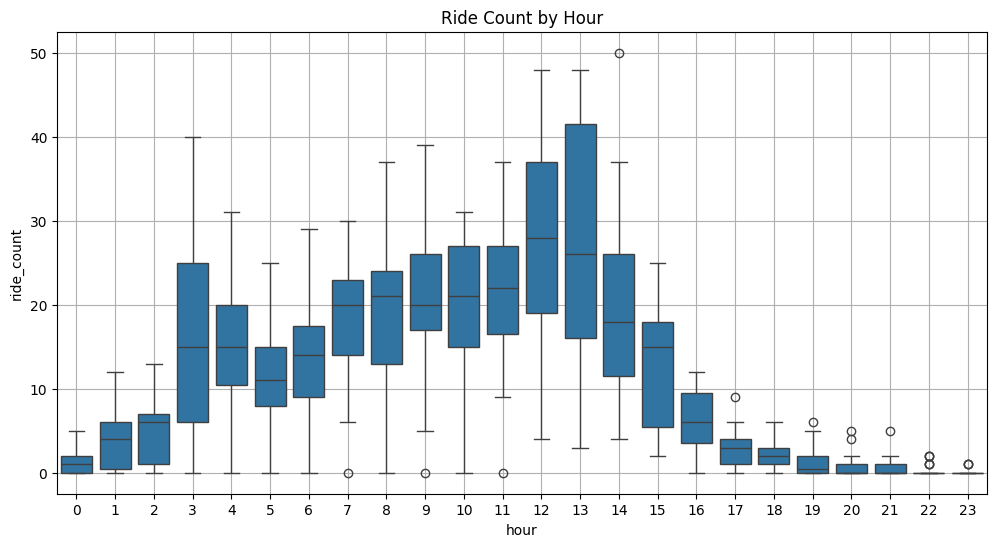

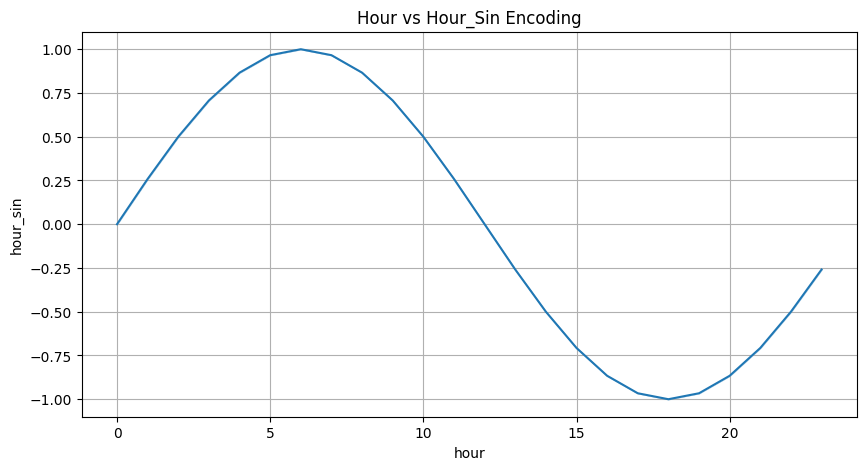

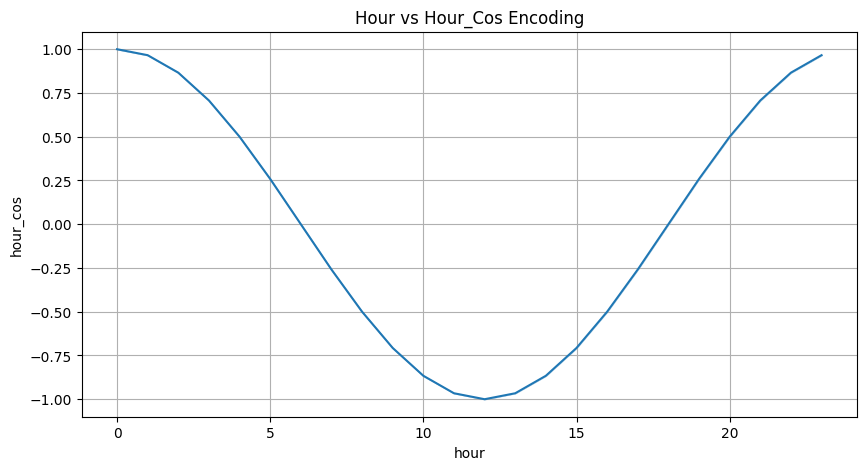

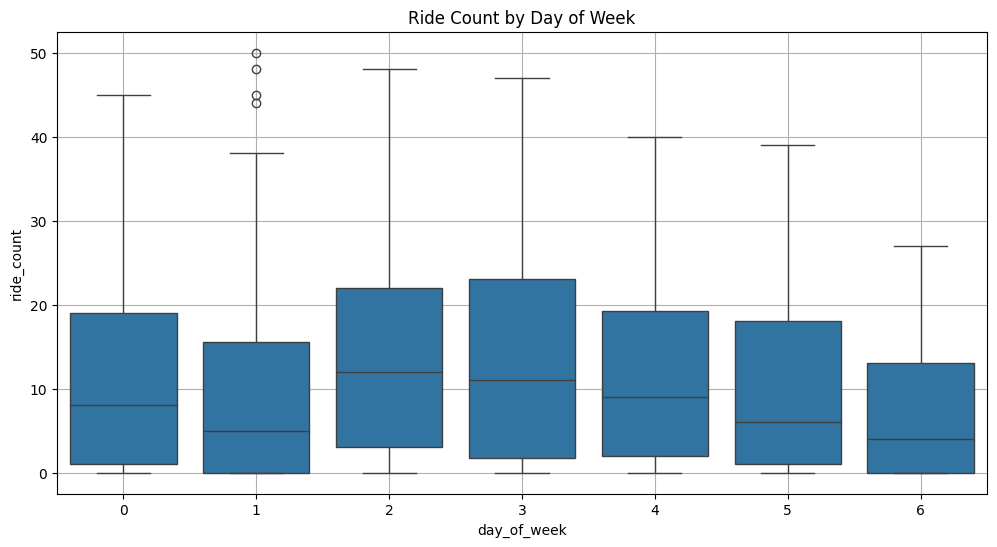

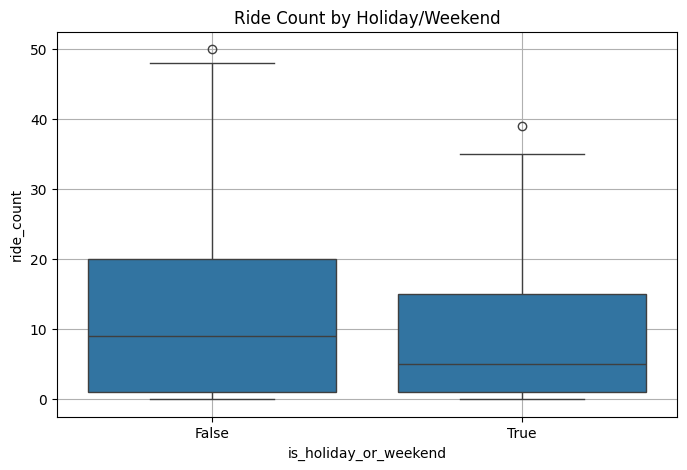

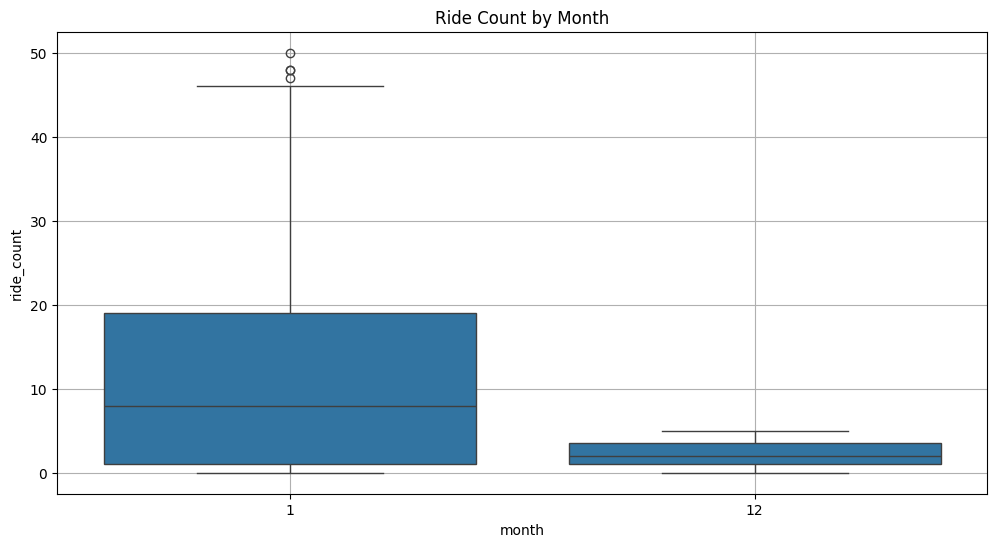

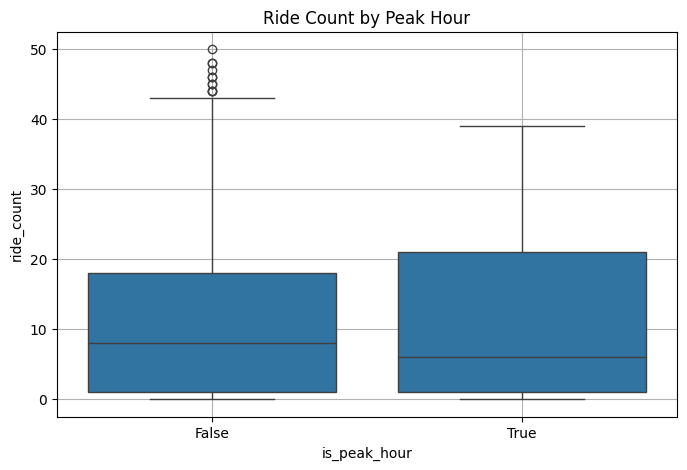

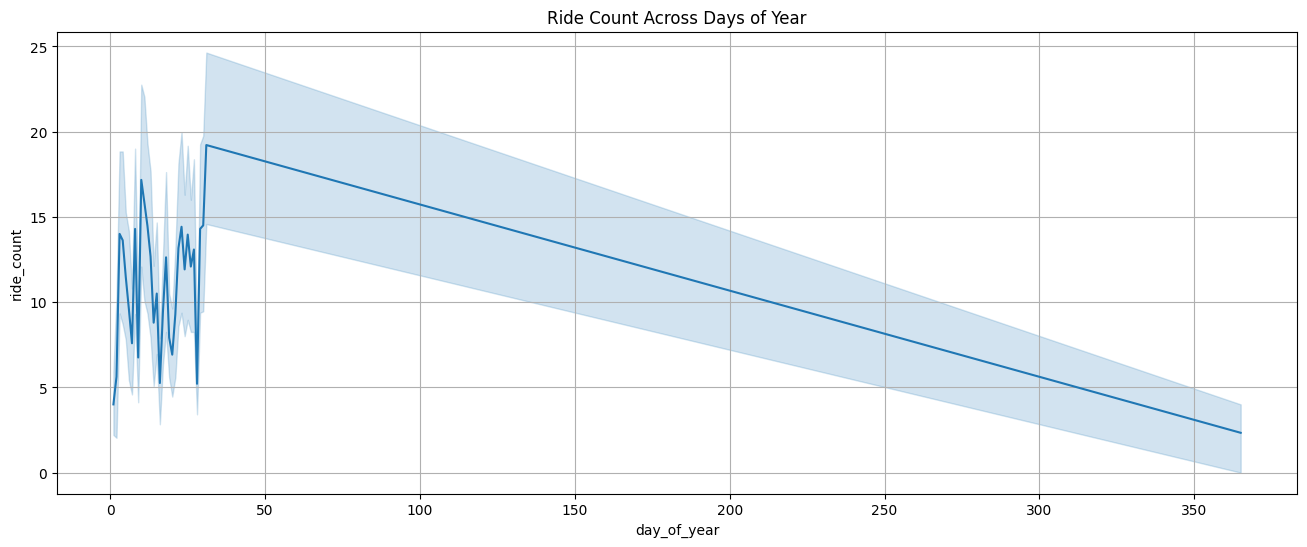

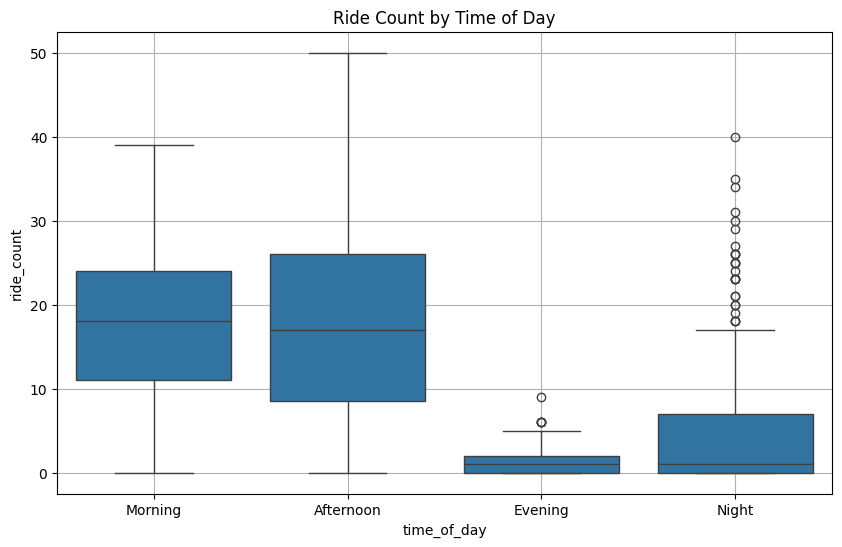

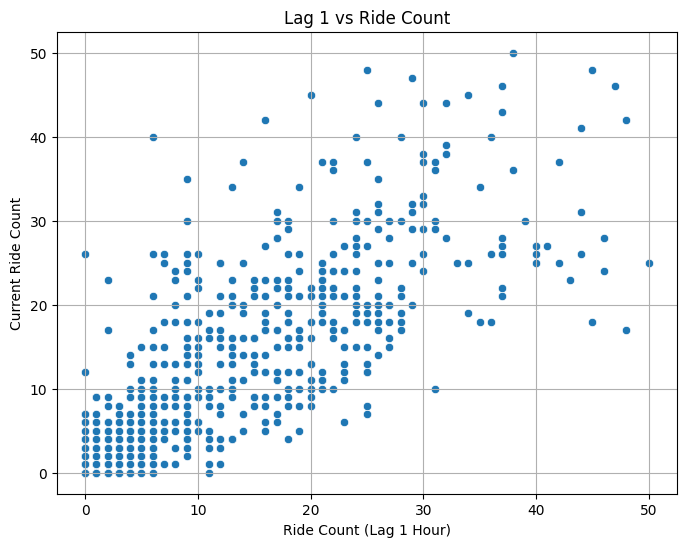

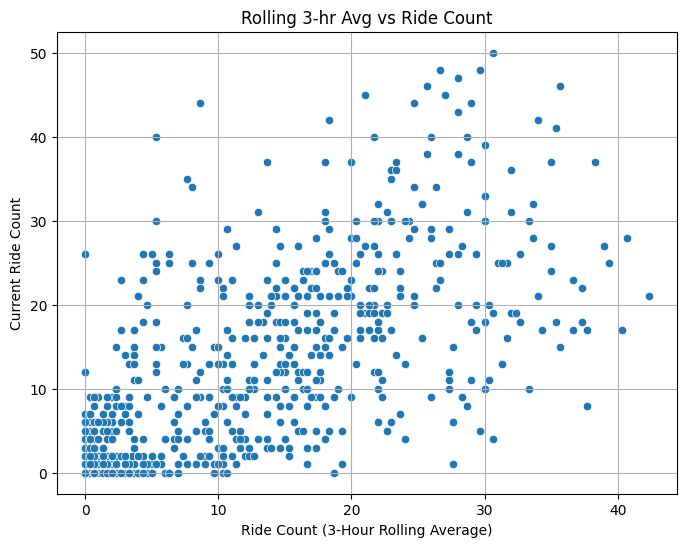

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# === Load Preprocessed Data ===
input_path = Path("../data/processed/timeseries")
file_path = input_path / "rides_2024_01.parquet"
df = pd.read_parquet(file_path)

# Focus only on Top 1 Station
top_station_id = (
    df.groupby("start_station_id")["ride_count"]
    .sum()
    .sort_values(ascending=False)
    .head(1)
    .index[0]
)

df_top = df[df["start_station_id"] == top_station_id].reset_index(drop=True)

# === Feature Engineering (same as before) ===
df_top["is_weekend"] = df_top["day_of_week"].isin([5, 6])
df_top["is_holiday"] = False
df_top["is_holiday_or_weekend"] = df_top["is_holiday"] | df_top["is_weekend"]
df_top["month"] = df_top["hour_ts"].dt.month
df_top["day_of_year"] = df_top["hour_ts"].dt.dayofyear
df_top["is_peak_hour"] = df_top["hour"].isin([7, 8, 9, 17, 18, 19])

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df_top["time_of_day"] = df_top["hour"].apply(categorize_time_of_day)

df_top["ride_count_lag_1"] = df_top["ride_count"].shift(1)
df_top["ride_count_roll3"] = df_top["ride_count"].shift(1).rolling(3, min_periods=1).mean()

df_top = df_top.dropna().reset_index(drop=True)

# === Now Plot Each Feature ===

# 1. Hour vs Ride Count
plt.figure(figsize=(12,6))
sns.boxplot(x="hour", y="ride_count", data=df_top)
plt.title("Ride Count by Hour")
plt.grid(True)
plt.show()

# 2. Hour_sin Cycle
plt.figure(figsize=(10,5))
sns.lineplot(x="hour", y="hour_sin", data=df_top)
plt.title("Hour vs Hour_Sin Encoding")
plt.grid(True)
plt.show()

# 3. Hour_cos Cycle
plt.figure(figsize=(10,5))
sns.lineplot(x="hour", y="hour_cos", data=df_top)
plt.title("Hour vs Hour_Cos Encoding")
plt.grid(True)
plt.show()

# 4. Day of Week vs Ride Count
plt.figure(figsize=(12,6))
sns.boxplot(x="day_of_week", y="ride_count", data=df_top)
plt.title("Ride Count by Day of Week")
plt.grid(True)
plt.show()

# 5. is_holiday_or_weekend vs Ride Count
plt.figure(figsize=(8,5))
sns.boxplot(x="is_holiday_or_weekend", y="ride_count", data=df_top)
plt.title("Ride Count by Holiday/Weekend")
plt.grid(True)
plt.show()

# 6. Month vs Ride Count
plt.figure(figsize=(12,6))
sns.boxplot(x="month", y="ride_count", data=df_top)
plt.title("Ride Count by Month")
plt.grid(True)
plt.show()

# 7. is_peak_hour vs Ride Count
plt.figure(figsize=(8,5))
sns.boxplot(x="is_peak_hour", y="ride_count", data=df_top)
plt.title("Ride Count by Peak Hour")
plt.grid(True)
plt.show()

# 8. Day of Year vs Average Ride Count
plt.figure(figsize=(16,6))
sns.lineplot(x="day_of_year", y="ride_count", data=df_top)
plt.title("Ride Count Across Days of Year")
plt.grid(True)
plt.show()

# 9. Time of Day vs Ride Count
plt.figure(figsize=(10,6))
sns.boxplot(x="time_of_day", y="ride_count", data=df_top,
            order=["Morning", "Afternoon", "Evening", "Night"])
plt.title("Ride Count by Time of Day")
plt.grid(True)
plt.show()

# 10. Lag-1 vs Ride Count (Scatter)
plt.figure(figsize=(8,6))
sns.scatterplot(x="ride_count_lag_1", y="ride_count", data=df_top)
plt.title("Lag 1 vs Ride Count")
plt.xlabel("Ride Count (Lag 1 Hour)")
plt.ylabel("Current Ride Count")
plt.grid(True)
plt.show()

# 11. Rolling Average vs Ride Count (Scatter)
plt.figure(figsize=(8,6))
sns.scatterplot(x="ride_count_roll3", y="ride_count", data=df_top)
plt.title("Rolling 3-hr Avg vs Ride Count")
plt.xlabel("Ride Count (3-Hour Rolling Average)")
plt.ylabel("Current Ride Count")
plt.grid(True)
plt.show()
